### Attempt model on example image

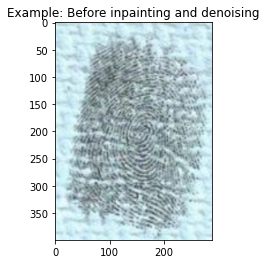

In [1]:
#from baseline_aug import get_unet, input_shape
import glob
from cv2 import imread
from skimage.transform import resize
import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import label
#from pycocotools import mask as maskUtils
from tqdm import tqdm
import os
import cv2
from tensorflow.keras.layers import ReLU
from tensorflow.keras.models import load_model

model = load_model('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/baseline_unet_aug_do_0.1_activation_ReLU_weights.best (1).hdf5')
imgs = resize(cv2.imread('C:/Users/leona/OneDrive/DSA4199/SUBMISSION/Test Dataset/Joss/RAW/wrongly_classified/1ALI.jpg')/255., (400, 288))

plt.imshow(imgs,cmap='gray')
plt.title('Example: Before inpainting and denoising')
plt.show()

imgs = imgs.reshape((1,400,288,3))
imgs = np.array(imgs)
pred = model.predict(imgs)
pred = np.clip(pred, 0, 1)
pred = pred.reshape(400,288)

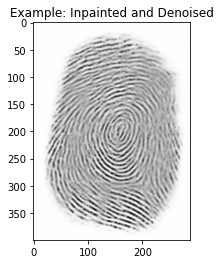

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import sys
plt.imshow(pred*255,cmap='gray')
plt.title('Example: Inpainted and Denoised')
plt.show()

### Inpainting and denoising all the wrongly classified images

In [227]:
wrong = ['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/TEST/REPORT2/SCANNER/RAW/wrongly_classified/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/TEST/REPORT2/SCANNER/RAW/wrongly_classified')]
name = [s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/TEST/REPORT2/SCANNER/RAW/wrongly_classified')]

In [228]:
import numpy as np
import cv2
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
from skimage.transform import resize
model = load_model('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/baseline_unet_aug_do_0.1_activation_ReLU_weights.best (1).hdf5')

In [229]:
os.chdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/TEST/REPORT2/SCANNER/RAW/wrongly_classified_denoise')
for i in range(len(wrong)):
    imgs = resize(cv2.imread(wrong[i],0)/255., (400, 288))
    imgs = gray2rgb(imgs)
    imgs = imgs.reshape((1,400,288,3))
    imgs = np.array(imgs)
    pred = model.predict(imgs)
    pred = np.clip(pred, 0, 1)
    pred = pred.reshape(400,288)
    cv2.imwrite(name[i],pred*255)